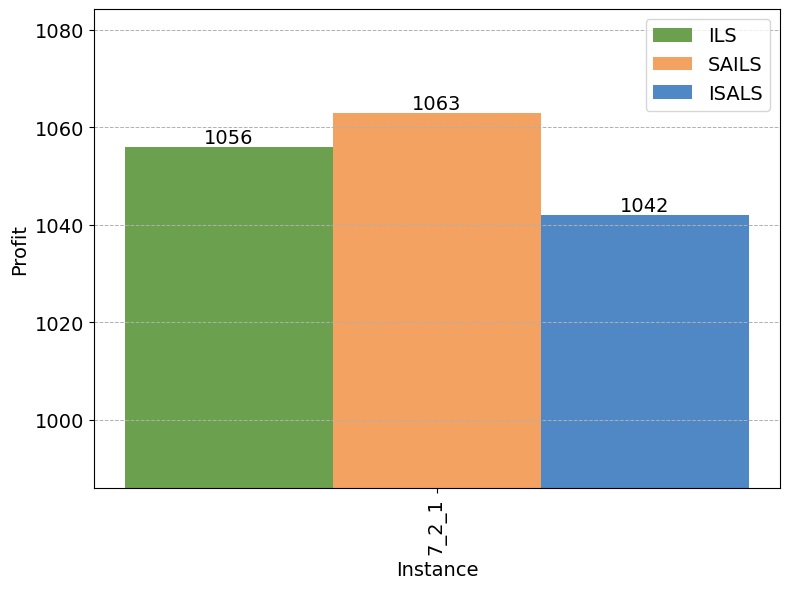

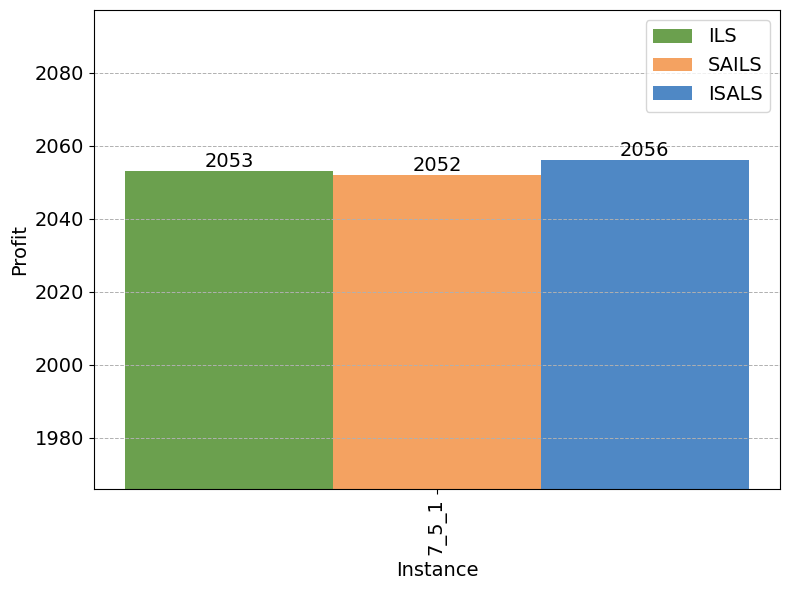

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the CSV files (assuming they are in the same folder as the Jupyter notebook)
ils_file = './ILS_721_751_results_2h.csv'
isals_file = './ISALS_721_751_results_2h.csv'
sails_file = './SAILS_721_751_results_2h.csv'

ils_df = pd.read_csv(ils_file)
isals_df = pd.read_csv(isals_file)
sails_df = pd.read_csv(sails_file)

# Merge the dataframes on 'Instance' for comparison
merged_df = pd.merge(ils_df[['Instance', 'Profit']], isals_df[['Instance', 'Profit']], on='Instance', suffixes=('_ILS', '_ISALS'))
merged_df = pd.merge(merged_df, sails_df[['Instance', 'Profit']], on='Instance')
merged_df = merged_df.rename(columns={'Profit': 'Profit_SAILS'})

# Function to plot instance groups with custom minimum y-axis, grid lines on y-axis only, and save the figure
def plot_instance_group_with_custom_min(prefix, min_value, file_name):
    subset_df = merged_df[merged_df['Instance'].str.startswith(prefix)]
    
    instances = subset_df['Instance']
    profits_ils = subset_df['Profit_ILS']
    profits_isals = subset_df['Profit_ISALS']
    profits_sails = subset_df['Profit_SAILS']
    
    x = range(len(instances))  # Positions for the bars

    plt.figure(figsize=(8, 6))
    
    # Reorder the bars to ILS, SAILS, ISALS
    bar_ils = plt.bar(x, profits_ils, width=0.25, label='ILS', color='#6ba04e', align='center')  # Muted green
    bar_sails = plt.bar([i + 0.25 for i in x], profits_sails, width=0.25, label='SAILS', color='#f4a261', align='center')  # Muted orange
    bar_isals = plt.bar([i + 0.5 for i in x], profits_isals, width=0.25, label='ISALS', color='#4f88c5', align='center')  # Muted blue
    
    # Add the profit values on top of each bar
    for bar in bar_ils:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=14)
    
    for bar in bar_sails:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=14)

    for bar in bar_isals:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=14)
    
    plt.xlabel('Instance', fontsize=14)
    plt.ylabel('Profit', fontsize=14)
    plt.xticks([i + 0.25 for i in x], instances, rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(min_value, max(profits_ils.max(), profits_isals.max(), profits_sails.max()) * 1.02)
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7)  # Grid lines only on y-axis
    plt.legend(fontsize=14)
    plt.tight_layout()

    # Save the figure in high quality (300 DPI)
    plt.savefig(file_name, format='png', dpi=300)
    plt.show()

# Plot for '7_2' instances with custom min y-axis of 986 and save
plot_instance_group_with_custom_min('7_2', 986, 'flexi_profit_comparison_7_2_1.png')

# Plot for '7_5' instances with custom min y-axis of 1966 and save
plot_instance_group_with_custom_min('7_5', 1966, 'flexi_profit_comparison_7_5_1.png')

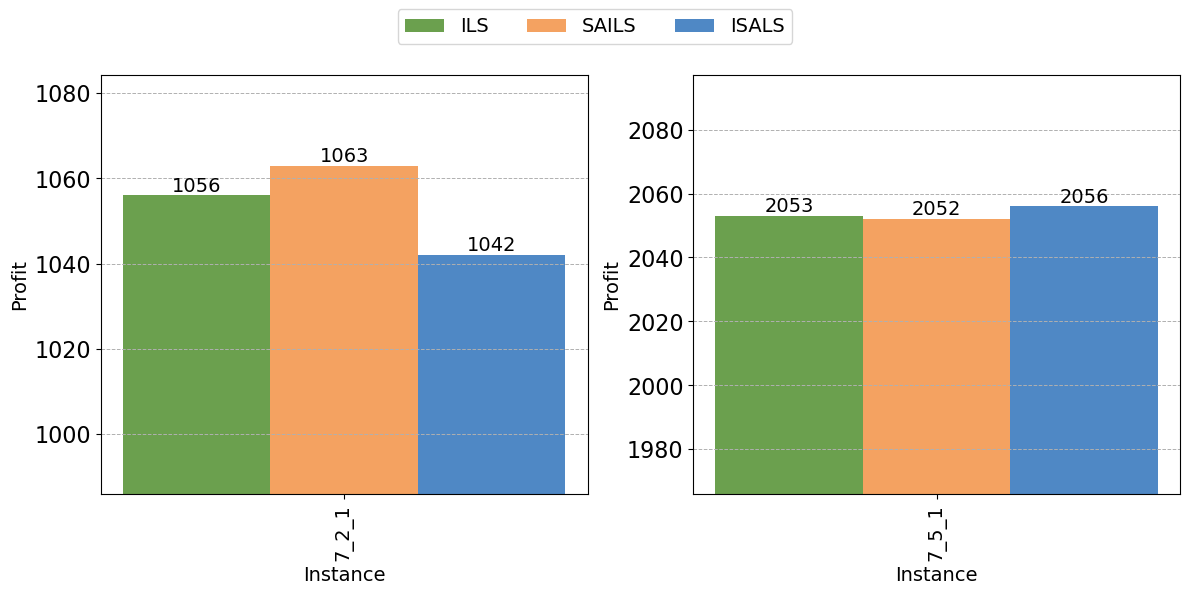

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files (assuming they are in the same folder as the Jupyter notebook)
ils_file = './ILS_721_751_results_2h.csv'
isals_file = './ISALS_721_751_results_2h.csv'
sails_file = './SAILS_721_751_results_2h.csv'

ils_df = pd.read_csv(ils_file)
isals_df = pd.read_csv(isals_file)
sails_df = pd.read_csv(sails_file)

# Merge the dataframes on 'Instance' for comparison
merged_df = pd.merge(ils_df[['Instance', 'Profit']], isals_df[['Instance', 'Profit']], on='Instance', suffixes=('_ILS', '_ISALS'))
merged_df = pd.merge(merged_df, sails_df[['Instance', 'Profit']], on='Instance')
merged_df = merged_df.rename(columns={'Profit': 'Profit_SAILS'})

# Function to plot instance groups with custom minimum y-axis, grid lines on y-axis only
def plot_instance_group_with_custom_min(ax, prefix, min_value):
    # Adjusting the filter to match instances starting with the prefix
    subset_df = merged_df[merged_df['Instance'].str.startswith(prefix)]
    
    instances = subset_df['Instance']
    profits_ils = subset_df['Profit_ILS']
    profits_isals = subset_df['Profit_ISALS']
    profits_sails = subset_df['Profit_SAILS']
    
    x = range(len(instances))  # Positions for the bars

    # Reorder the bars: ILS, SAILS, ISALS
    bar_ils = ax.bar(x, profits_ils, width=0.25, label='ILS', color='#6ba04e', align='center')  # Muted green
    bar_sails = ax.bar([i + 0.25 for i in x], profits_sails, width=0.25, label='SAILS', color='#f4a261', align='center')  # Muted orange
    bar_isals = ax.bar([i + 0.5 for i in x], profits_isals, width=0.25, label='ISALS', color='#4f88c5', align='center')  # Muted blue
    
    # Add the profit values on top of each bar
    for bar in bar_ils:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=14)
    
    for bar in bar_sails:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=14)

    for bar in bar_isals:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=14)
    
    ax.set_xlabel('Instance', fontsize=14)
    ax.set_ylabel('Profit', fontsize=14)
    ax.set_xticks([i + 0.25 for i in x])
    ax.set_xticklabels(instances, rotation=90, fontsize=14)
    ax.tick_params(axis='y', labelsize=16)
    
    # Set the y-limit based on actual data, with a small margin
    max_profit = max(profits_ils.max(), profits_isals.max(), profits_sails.max())
    ax.set_ylim(min_value, max_profit * 1.02)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.7)  # Grid lines only on y-axis

# Create the figure with 2 subplots side by side, no shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # One row, two columns, no shared y-axis

# Plot each group of instances
plot_instance_group_with_custom_min(axes[0], '7_2', 986)
plot_instance_group_with_custom_min(axes[1], '7_5', 1966)

# Add a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=14)

# Adjust layout for a cleaner look and leave more space for the legend
plt.subplots_adjust(top=0.85)  # Increase top margin for the legend
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Leave more space for the legend

# Save the combined figure
plt.savefig('flexi_profit_comparison_combined.png', format='png', dpi=300)

# Show the combined figure
plt.show()